<a href="https://colab.research.google.com/github/NasimulNabil/Credit-Recovery-Old-/blob/main/Prediction_of_credit_recovery_using_deep_learning_algorithm(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Research/loan_data_feature.csv')
df.head()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,good_credit,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,1,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1.0,1.0,1.0,1,1,1,14850.0,14850.0,18450.0,20250.0,22050.0,23850.0,1,0,0,1,1,0,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,8000.0,1.0,1.0,1000,1000,1500,123500.0,137700.0,151900.0,165600.0,178800.0,191500.0,1,0,0,1,1,0,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1.0,1.0,1.0,5000,1,1,113300.0,127500.0,141700.0,151400.0,165600.0,179800.0,1,0,0,1,1,0,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1.0,1.0,1.0,1,1,1,93600.0,107800.0,122000.0,136200.0,150400.0,164600.0,1,0,0,1,1,0,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,1.0,1.0,1.0,1,1,5000,90304.0,101560.0,112816.0,124072.0,135328.0,141584.0,5,1,0,1,1,0,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(4600, 50)

In [ ]:
df.isnull().any()

long_term                            False
emi_loan                             False
individual_loan                      False
consumer_loan                        False
agri_loan                            False
interest_free                        False
staff_loan                           False
secured_unsecured                    False
annual_income_lavel                  False
loan_type                            False
good_credit_life                     False
customer_relation_day                False
contract_value                       False
contract_mat_day_remain              False
customer_age_year                    False
int_rate                             False
current_os_amount                    False
total_sanction_amt                   False
total_disb_amt                       False
total_recov_amt                      False
total_int_amt                        False
total_repayable_amt                  False
emi_amount                           False
num_of_inst

In [ ]:
df.describe()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,good_credit,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
count,4600.0,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000
mean,1.0,0.713696,0.888696,0.119783,0.014783,0.120435,0.888696,0.780435,1.817607,2.028982,517.769348,1386.743149,1.777041e+06,1.308415e+03,42.201919,9.622935,78411.473448,1.264629e+05,1.185913e+05,16941.131185,9466.971070,2.433128e+05,17466.870096,56.819130,826.763252,1005.599228,1132.079954,783.709783,944.139130,1140.625870,1.456378e+05,1.635493e+05,1.708275e+05,1.845232e+05,1.992130e+05,2.119296e+05,1.431739,0.196087,0.070652,0.929348,0.973043,0.026957,1.075681e+06,1.792801e+05,5832.917217,972.152870,2.088943,4.194499e+04,272.730531,3.477550
std,0.0,0.452083,0.314543,0.324742,0.120695,0.325505,0.314543,0.413997,0.852243,1.825929,137.531517,1649.788843,4.414133e+07,2.885902e+04,11.742906,1.903935,76894.946036,1.793228e+05,1.673392e+05,29524.363935,16731.457321,7.318280e+05,53569.402777,948.088474,3078.644522,5601.062043,4760.222867,2633.568507,3667.455761,6315.678007,4.620690e+05,5.154544e+05,5.594252e+05,6.102264e+05,6.586448e+05,7.120261e+05,1.300021,0.397078,0.256271,0.256271,0.161974,0.161974,3.500029e+06,5.833382e+05,16012.690282,2668.781714,3.329046,1.778123e+05,716.843344,4.581254
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,100.000000,236.000000,1.200000e+04,0.000000e+00,1.000000,5.000000,10155.000000,1.200000e+04,1.079200e+04,0.000000,0.000000,6.000000e+03,450.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-5.940000e+04,-7.465000e+04,-1.000000e+05,-1.056000e+05,-1.028000e+05,-1.084000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.670000e+05,-7.783333e+04,5.000000,0.833333,0.004193,-2.235000e+03,18.891688,0.000000
25%,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,417.000000,668.750000,6.000000e+04,3.330000e+02,34.000000,9.000000,40266.750000,5.000000e+04,5.000000e+04,0.000000,2571.000000,2.700000e+04,2000.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+04,1.600000e+04,1.735000e+04,1.870000e+04,2.014000e+04,2.160000e+04,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.122750e+05,1.871250e+04,6.000000,1.000000,1.111111,6.964260e+01,87.299384,0.000000
50%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,488.000000,828.000000,7.200000e+04,5.690000e+02,42.000000,9.000000,50250.000000,5.000000e+04,5.113600e+04,6000.000000,4563.500000,3.800000e+04,2500.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.815000e+04,2.015000e+04,2.215000e+04,2.400000e+04,2.600000e+04,2.783200e+04,1.

In [ ]:
df.columns

Index(['long_term', 'emi_loan', 'individual_loan', 'consumer_loan',
       'agri_loan', 'interest_free', 'staff_loan', 'secured_unsecured',
       'annual_income_lavel', 'loan_type', 'good_credit_life',
       'customer_relation_day', 'contract_value', 'contract_mat_day_remain',
       'customer_age_year', 'int_rate', 'current_os_amount',
       'total_sanction_amt', 'total_disb_amt', 'total_recov_amt',
       'total_int_amt', 'total_repayable_amt', 'emi_amount',
       'num_of_installment', 'pay_month_01', 'pay_month_02', 'pay_month_03',
       'pay_month_04', 'pay_month_05', 'pay_month_06', 'bill_amount_01',
       'bill_amount_02', 'bill_amount_03', 'bill_amount_04', 'bill_amount_05',
       'bill_amount_06', 'number_of_loan_ac', 'good_credit',
       'total_bl_countMoreThanOne', 'total_bl_countOne',
       'repayment_frequencyMonth', 'repayment_frequencyMoreThanMonth',
       'total_bill_amount', 'mean_bill_amount', 'total_pay_amount',
       'mean_pay_amount', 'ratio_of_total_paym

In [ ]:
df['long_term'].unique()

array([1])

In [ ]:
df.drop(['pay_month_01','pay_month_02','pay_month_03','pay_month_04','pay_month_05','pay_month_06',\
        'bill_amount_01','bill_amount_02','bill_amount_03','bill_amount_04','bill_amount_05','bill_amount_06',\
         'total_bl_countMoreThanOne','repayment_frequencyMoreThanMonth','long_term'],axis=1,\
        inplace=True)
df.shape

(4600, 35)

In [ ]:
x = df.drop(['good_credit'],axis=1)
x.head()

,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,number_of_loan_ac,total_bl_countOne,repayment_frequencyMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1,1,1,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,1,1,1,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1,1,1,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1,1,1,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,5,1,1,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
x.shape

(4600, 34)

In [ ]:
y = df['good_credit']
y

0       0
1       0
2       0
3       0
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: good_credit, Length: 4600, dtype: int64

In [ ]:
y.value_counts()

0    3698
1     902
Name: good_credit, dtype: int64

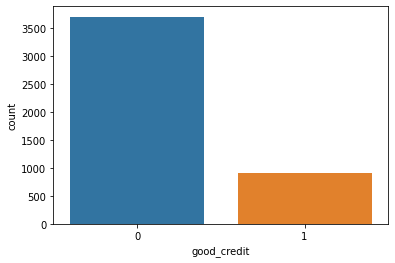

In [ ]:
import seaborn as sns
sns.countplot(x='good_credit',data=df)

### **Handling Imbalanced to Balanced Dataset using SMOTE(Oversampling) Technique**

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)
unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{0: 3698, 1: 3698}

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
scale_inputs = standardization.fit_transform(x_sm)

In [ ]:
x_sm = scale_inputs
x_sm

array([[-1.62738134,  0.35192285, -0.46391188, ..., -0.11777876,
        -0.30110547,  1.34358949],
       [ 0.65459737,  0.35192285, -0.46391188, ..., -0.23567507,
         0.13119305, -0.50970653],
       [ 0.65459737,  0.35192285, -0.46391188, ..., -0.23509591,
         0.1214553 , -0.34437246],
       ...,
       [ 0.24536971,  0.35192285,  1.78840146, ..., -0.19797346,
         2.53727197, -0.66122579],
       [-1.62738134,  0.35192285, -0.46391188, ..., -0.02640793,
        -0.26409304, -0.81352555],
       [ 0.08406149,  0.35192285, -0.46391188, ..., -0.23601517,
        -0.27424412, -0.04346144]])

### **Train-Test Split** 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 2958, 1: 2958}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 740, 1: 740}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
models = []
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Support Vector Machine',SVC()))
models.append(('Gaussian Naive Bayes',GaussianNB()))
models.append(('Bernoulli Naive Bayes',BernoulliNB()))
models.append(('XGBoost',XGBClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))

results = []

for name,model in models:
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    predictions = model.predict(x_test)
    results.append({
        'model': name,
        'Accuracy_Score':score,
        'Precision': precision_score(y_test,predictions),
        'Recall': recall_score(y_test,predictions),
        'F1-Score': f1_score(y_test,predictions),
        'AUC': roc_auc_score(y_test,predictions)
    })
    msg = "%s : %f " % (name, score)
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression : 0.683784 
Random Forest : 0.925676 
KNN : 0.816216 
Decision Tree : 0.866892 
Support Vector Machine : 0.788514 
Gaussian Naive Bayes : 0.543243 
Bernoulli Naive Bayes : 0.635811 
XGBoost : 0.899324 
AdaBoost : 0.870270 
Linear Discriminant Analysis : 0.685135 


In [ ]:
df = pd.DataFrame(results,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.683784,0.737762,0.570270,0.643293,0.683784
1,Random Forest,0.925676,0.952586,0.895946,0.923398,0.925676
2,KNN,0.816216,0.806283,0.832432,0.819149,0.816216
3,Decision Tree,0.866892,0.860558,0.875676,0.868051,0.866892
4,Support Vector Machine,0.788514,0.832037,0.722973,0.773680,0.788514
5,Gaussian Naive Bayes,0.543243,0.524206,0.936486,0.672163,0.543243
6,Bernoulli Naive Bayes,0.635811,0.683060,0.506757,0.581846,0.635811
7,XGBoost,0.899324,0.958140,0.835135,0.892419,0.899324
8,AdaBoost,0.870270,0.912651,0.818919,0.863248,0.870270
9,Linear Discriminant Analysis,0.685135,0.747292,0.559459,0.639876,0.685135


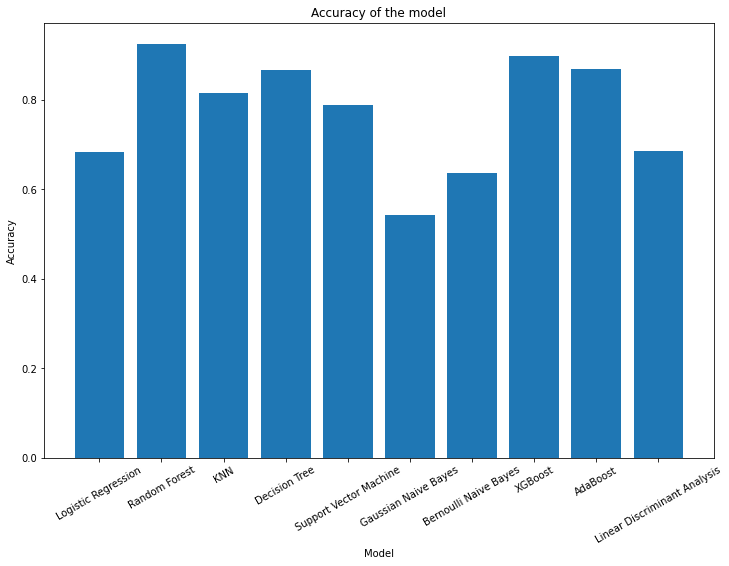

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.xticks(rotation=30)
plt.bar(df['model'],df['Accuracy_Score'])
plt.show()

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9283783783783783

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       740
           1       0.96      0.90      0.93       740

    accuracy                           0.93      1480
   macro avg       0.93      0.93      0.93      1480
weighted avg       0.93      0.93      0.93      1480



Text(69.0, 0.5, 'True Output')

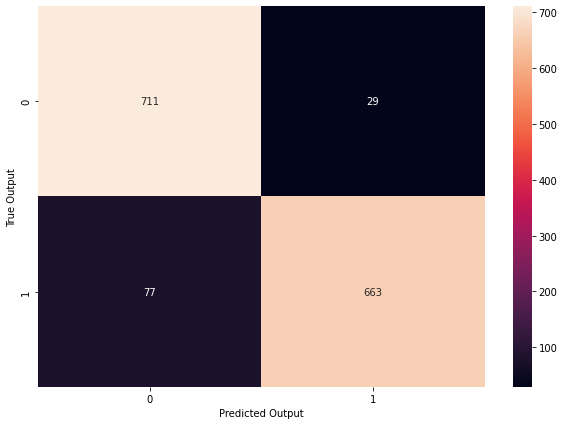

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

### **ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(500,input_shape=(34,),activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                            
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 1s 4ms/step - loss: 0.5443 - accuracy: 0.7104
Epoch 2/100
185/185 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7720
Epoch 3/100
185/185 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.7921
Epoch 4/100
185/185 [==============================] - 1s 4ms/step - loss: 0.4067 - accuracy: 0.8112
Epoch 5/100
185/185 [==============================] - 1s 4ms/step - loss: 0.3757 - accuracy: 0.8257
Epoch 6/100
185/185 [==============================] - 1s 4ms/step - loss: 0.3577 - accuracy: 0.8369
Epoch 7/100
185/185 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.8526
Epoch 8/100
185/185 [==============================] - 1s 4ms/step - loss: 0.3159 - accuracy: 0.8612
Epoch 9/100
185/185 [==============================] - 1s 4ms/step - loss: 0.2970 - accuracy: 0.8722
Epoch 10/100
185/185 [==============================] - 1s 4ms/step - loss: 0.2757 - accura

Text(0.5, 1.0, 'Training Loss')

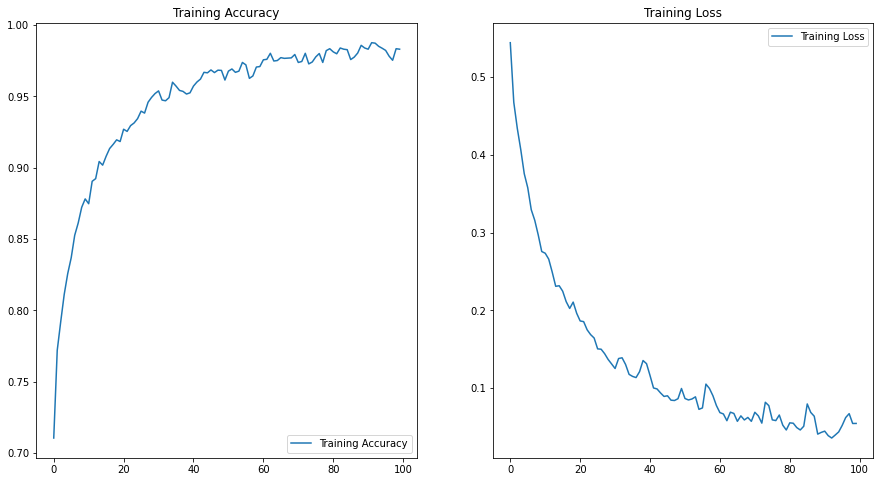

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
model.evaluate(x_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.9007


[0.4707813858985901, 0.9006756544113159]

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[9.993478e-01],
       [7.771320e-07],
       [1.000000e+00],
       ...,
       [9.805509e-01],
       [1.000000e+00],
       [9.989550e-01]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred[:10]

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

results_deep_learning = []
results_deep_learning.append({
    'model': "ANN",
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,ANN,0.900676,0.870162,0.941892,0.904607,0.900676


Text(69.0, 0.5, 'True Output')

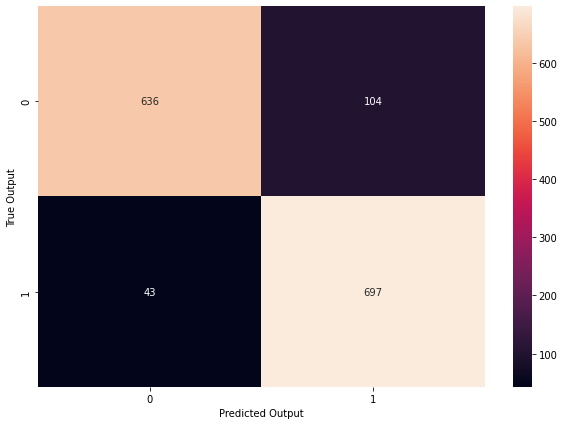

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

### **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(800,700),max_iter=8000,activation='relu')
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.9054054054054054

In [ ]:
y_pred = mlp.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

results_deep_learning.append({
    'model': "MLP",
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,ANN,0.900676,0.870162,0.941892,0.904607,0.900676
1,MLP,0.905405,0.910959,0.898649,0.904762,0.905405


Text(69.0, 0.5, 'True Output')

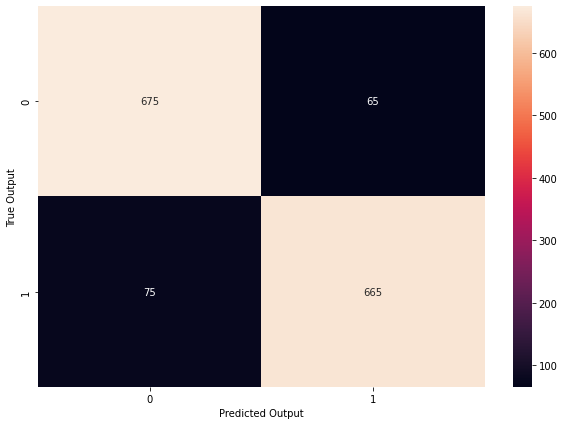

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

### **CNN**

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5916, 34)
(1480, 34)


In [ ]:
x_train = x_train.reshape((len(x_train),34,1))
x_train.shape

(5916, 34, 1)

In [ ]:
x_test = x_test.reshape((len(x_test),34,1))
x_test.shape

(1480, 34, 1)

In [ ]:

model = keras.Sequential([
        keras.layers.Conv1D(filters=200,kernel_size=3,padding='same',activation='relu',input_shape=(34,1)),
        keras.layers.MaxPooling1D((2,)),
    
        keras.layers.Conv1D(filters=100,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),                           
        
        keras.layers.Conv1D(filters=50,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),                           
        
        keras.layers.Conv1D(filters=30,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),

        keras.layers.Flatten(),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                           
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
185/185 [==============================] - 5s 19ms/step - loss: 0.5895 - accuracy: 0.6748
Epoch 2/200
185/185 [==============================] - 3s 18ms/step - loss: 0.5169 - accuracy: 0.7348
Epoch 3/200
185/185 [==============================] - 3s 18ms/step - loss: 0.4645 - accuracy: 0.7853
Epoch 4/200
185/185 [==============================] - 2s 12ms/step - loss: 0.4293 - accuracy: 0.8019
Epoch 5/200
185/185 [==============================] - 2s 12ms/step - loss: 0.3941 - accuracy: 0.8181
Epoch 6/200
185/185 [==============================] - 2s 12ms/step - loss: 0.3724 - accuracy: 0.8300
Epoch 7/200
185/185 [==============================] - 2s 12ms/step - loss: 0.3545 - accuracy: 0.8413
Epoch 8/200
185/185 [==============================] - 2s 12ms/step - loss: 0.3307 - accuracy: 0.8497
Epoch 9/200
185/185 [==============================] - 2s 12ms/step - loss: 0.3169 - accuracy: 0.8617
Epoch 10/200
185/185 [==============================] - 2s 12ms/step - loss: 0.301

Text(0.5, 1.0, 'Training Loss')

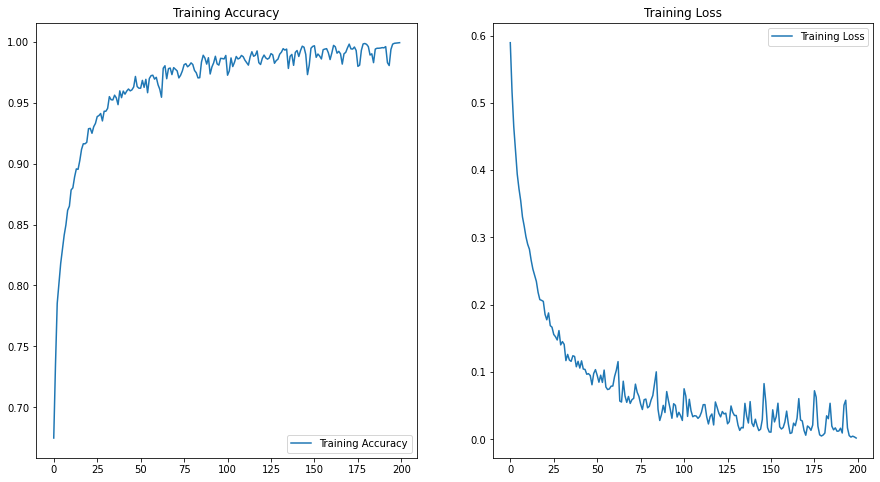

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(200),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(200),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 0s 4ms/step - loss: 0.9157 - accuracy: 0.8986


[0.9157222509384155, 0.8986486196517944]

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred[:10]

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1.], dtype=float32)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

results_deep_learning.append({
    'model': "CNN",
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,ANN,0.900676,0.870162,0.941892,0.904607,0.900676
1,MLP,0.905405,0.910959,0.898649,0.904762,0.905405
2,CNN,0.898649,0.903005,0.893243,0.898098,0.898649


Text(69.0, 0.5, 'True Output')

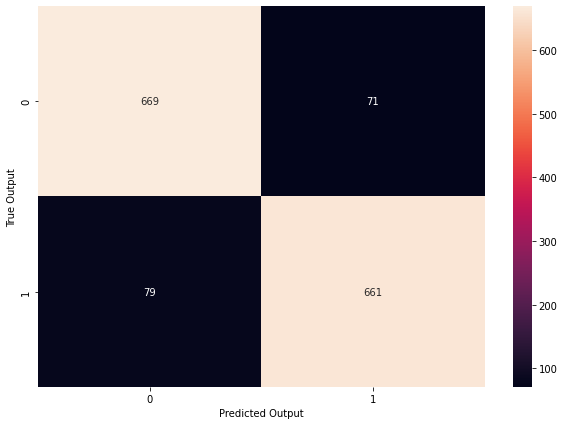

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

### **RNN**

In [ ]:
model = keras.Sequential([
        keras.layers.SimpleRNN(500,input_shape=(34,1),activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                            
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
185/185 [==============================] - 20s 98ms/step - loss: 0.6163 - accuracy: 0.6413
Epoch 2/200
185/185 [==============================] - 14s 77ms/step - loss: 0.5910 - accuracy: 0.6545
Epoch 3/200
185/185 [==============================] - 14s 78ms/step - loss: 0.5770 - accuracy: 0.6677
Epoch 4/200
185/185 [==============================] - 14s 78ms/step - loss: 0.5586 - accuracy: 0.6951
Epoch 5/200
185/185 [==============================] - 14s 78ms/step - loss: 0.5590 - accuracy: 0.6913
Epoch 6/200
185/185 [==============================] - 14s 77ms/step - loss: 0.5416 - accuracy: 0.7153
Epoch 7/200
185/185 [==============================] - 14s 75ms/step - loss: 0.5429 - accuracy: 0.7052
Epoch 8/200
185/185 [==============================] - 15s 80ms/step - loss: 0.5335 - accuracy: 0.7201
Epoch 9/200
185/185 [==============================] - 14s 75ms/step - loss: 0.5237 - accuracy: 0.7245
Epoch 10/200
185/185 [==============================] - 14s 77ms/step - l

In [ ]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 1s 23ms/step - loss: 0.3971 - accuracy: 0.8554


[0.3971165120601654, 0.8554053902626038]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[0.17412943],
       [0.17537972],
       [0.99998754],
       ...,
       [0.6908235 ],
       [0.9556329 ],
       [0.99973714]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred[:10]

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1.], dtype=float32)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

results_deep_learning.append({
    'model': "RNN",
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,ANN,0.900676,0.870162,0.941892,0.904607,0.900676
1,MLP,0.905405,0.910959,0.898649,0.904762,0.905405
2,CNN,0.898649,0.903005,0.893243,0.898098,0.898649
3,RNN,0.855405,0.869382,0.836486,0.852617,0.855405


### **LSTM**

In [ ]:

model = keras.Sequential([
        keras.layers.Dense(512,kernel_initializer='uniform',input_shape=(34,1)),                    
        keras.layers.LSTM(64,return_sequences=True,dropout=0.1, recurrent_dropout=0.1,activation='relu'),                  
        keras.layers.LSTM(64,activation='relu'),                  
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')                  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 27s 129ms/step - loss: 0.6407 - accuracy: 0.6253
Epoch 2/100
185/185 [==============================] - 24s 130ms/step - loss: 0.6084 - accuracy: 0.6432
Epoch 3/100
185/185 [==============================] - 23s 126ms/step - loss: 0.5927 - accuracy: 0.6572
Epoch 4/100
185/185 [==============================] - 23s 127ms/step - loss: 0.5920 - accuracy: 0.6562
Epoch 5/100
185/185 [==============================] - 24s 130ms/step - loss: 0.5830 - accuracy: 0.6650
Epoch 6/100
185/185 [==============================] - 24s 128ms/step - loss: 0.5766 - accuracy: 0.6773
Epoch 7/100
185/185 [==============================] - 23s 126ms/step - loss: 0.5725 - accuracy: 0.6778
Epoch 8/100
185/185 [==============================] - 24s 128ms/step - loss: 0.5584 - accuracy: 0.6859
Epoch 9/100
185/185 [==============================] - 24s 128ms/step - loss: 0.5477 - accuracy: 0.6859
Epoch 10/100
185/185 [==============================] - 24s 128m

In [ ]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 1s 18ms/step - loss: 0.3968 - accuracy: 0.8385


[0.3968161642551422, 0.8385134935379028]

### **GRU**

In [ ]:
model = keras.Sequential([
        keras.layers.Dense(512,kernel_initializer='uniform',input_shape=(34,1)),                    
        keras.layers.GRU(64,return_sequences=True,activation='relu'),                  
        keras.layers.GRU(64,activation='relu'),                  
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')                  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
185/185 [==============================] - 16s 75ms/step - loss: 0.6331 - accuracy: 0.6241
Epoch 2/10
185/185 [==============================] - 12s 67ms/step - loss: 0.6052 - accuracy: 0.6553
Epoch 3/10
185/185 [==============================] - 13s 68ms/step - loss: 0.5915 - accuracy: 0.6604
Epoch 4/10
185/185 [==============================] - 13s 68ms/step - loss: 0.5822 - accuracy: 0.6670
Epoch 5/10
185/185 [==============================] - 13s 70ms/step - loss: 0.5720 - accuracy: 0.6780
Epoch 6/10
185/185 [==============================] - 13s 68ms/step - loss: 0.5573 - accuracy: 0.6917
Epoch 7/10
185/185 [==============================] - 12s 67ms/step - loss: 0.5599 - accuracy: 0.6870
Epoch 8/10
185/185 [==============================] - 13s 69ms/step - loss: 0.5423 - accuracy: 0.6990
Epoch 9/10
185/185 [==============================] - 13s 69ms/step - loss: 0.5393 - accuracy: 0.7000
Epoch 10/10
185/185 [==============================] - 12s 67ms/step - loss: 0.530

In [ ]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 1s 14ms/step - loss: 0.5409 - accuracy: 0.6973


[0.540856122970581, 0.6972972750663757]